## Project Design Writeup

### Problem Statement 

Eatting healthy is a challenge. Using the Epicurious "Recipes by Nutrition and Ratings," I would like to predict healthy recipes. 

### Hypothesis

Fat and Sodium Content will directly correlate with Calorie count. 

Certain ingredients will correlate with lower Calorie count 

### Goal

The goal of this project is to predict healthy recipes based on protein, sodium and fat.

Secondary goal is to predict healthy recipes (lower calories) based on ingredients, ultimately coming up with a 10 ingredient list that count derive many different healthy recipes.

### Risks

Research has proven that portion size has a strong influence on calorie count and health. There is no information on whether these are single person portion sizes but will make this
assumption that they are. 

## Exploratory Data Analysis 

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier

In [45]:
df = pd.read_csv(('epi_r.csv'))

In [46]:
df

,title,rating,calories,protein,fat,...,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,...,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,...,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,...,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,...,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,...,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,...,0.0,0.0,0.0,0.0,0.0


## Basic Understand of Dataset

In [47]:
print df.head(5)
print df.info()
print df.describe().T

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat   ...    cookbooks  leftovers  snack  snack week  turkey  
0   7.0   ...          0.0        0.0    0.0         0.0     1.0  
1  23.0   ...          0.0        0.0    0.0         0.0     0.0  
2   7.0   ...          0.0        0.0    0.0         0.0     0.0  
3   NaN   ...          0.0        0.0    0.0         0.0     0.0  
4  32.0   ...          0.0        0.0    0.0         0.0     0.0  

[5 rows x 680 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turk

##### Analysis/Insights

There are 680 columns!Most of them are ingredients that make up each recipe.The data is already laid out like dummies variables so no cleaning will be needed there. However, there are many columns that aren't ingredients, so I may wish to get rid of them for my analysis. I would also consider grouping ingredients (i.e. tomatoes, broccoli = vegetables)

In [48]:
df.columns

Index([u'title', u'rating', u'calories', u'protein', u'fat', u'sodium',
       u'#cakeweek', u'#wasteless', u'22-minute meals',
       u'3-ingredient recipes',
       ...
       u'yellow squash', u'yogurt', u'yonkers', u'yuca', u'zucchini',
       u'cookbooks', u'leftovers', u'snack', u'snack week', u'turkey'],
      dtype='object', length=680)

In [49]:
df.isnull().sum()

title                      0
rating                     0
calories                4117
protein                 4162
fat                     4183
sodium                  4119
#cakeweek                  0
#wasteless                 0
22-minute meals            0
3-ingredient recipes       0
                        ... 
yellow squash              0
yogurt                     0
yonkers                    0
yuca                       0
zucchini                   0
cookbooks                  0
leftovers                  0
snack                      0
snack week                 0
turkey                     0
dtype: int64

(array([ 1836.,     0.,   164.,   124.,     0.,   532.,  1489.,  5169.,
         8019.,  2719.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

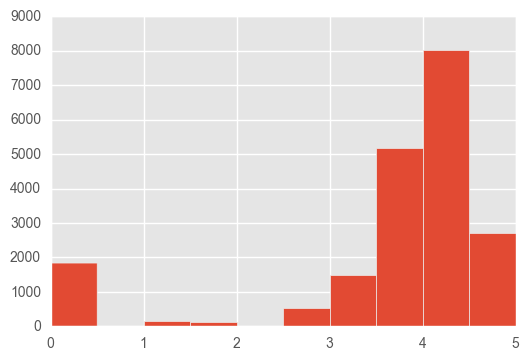

In [50]:
x = df.rating
y = df.title

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(x)


### Analysis/insight 

The majority of the ratings are above 3.0. It wouldn't be very interesting to do analysis of rating because the data is heavily skewed to the right.' 

Filter recipes with chicken

In [51]:
df[df.chicken == 1.0].count()

#There are 1,344 recipes in the dataset that include chicken

title                   1344
rating                  1344
calories                1049
protein                 1049
fat                     1049
sodium                  1049
#cakeweek               1344
#wasteless              1344
22-minute meals         1344
3-ingredient recipes    1344
                        ... 
yellow squash           1344
yogurt                  1344
yonkers                 1344
yuca                    1344
zucchini                1344
cookbooks               1344
leftovers               1344
snack                   1344
snack week              1344
turkey                  1344
dtype: int64

#### Create a for loop formula that will allow me to see which ingredient appears in the most number of recipes

### Calorie count
What is the calorie count for recipes at the various rating levels?
Hypothesis is that highly caloric foods will have high ratings 

In [52]:
#drop NAN values in calories, protein, sodium

print df.info()
drop_featureNA= df.dropna(subset=[['calories', 'protein', 'sodium']])
print drop_featureNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15888 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 82.5+ MB
None


In [53]:
df.dropna(subset=[['calories', 'protein', 'sodium']], inplace=True)

print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15888 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 82.5+ MB
None


(array([  1.58800000e+04,   5.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([        0. ,   3011121.8,   6022243.6,   9033365.4,  12044487.2,
         15055609. ,  18066730.8,  21077852.6,  24088974.4,  27100096.2,
         30111218. ]),
 <a list of 10 Patch objects>)

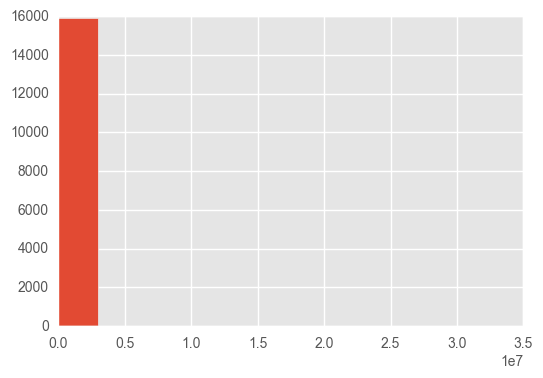

In [54]:
a = df.calories
b = df.protein

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(a)

In [55]:
df.calories.describe().T

# why are there some with so many calories?

count    1.588800e+04
mean     6.341284e+03
std      3.595766e+05
min      0.000000e+00
25%      1.990000e+02
50%      3.320000e+02
75%      5.870000e+02
max      3.011122e+07
Name: calories, dtype: float64

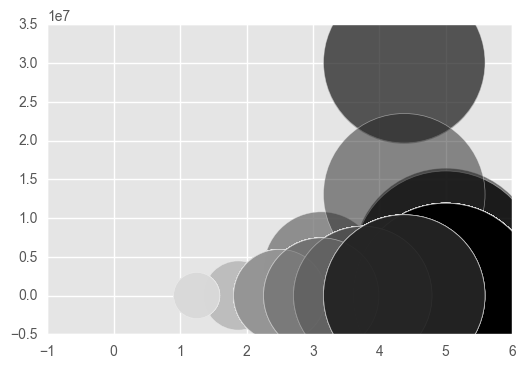

In [56]:
x = df.rating
y = df.calories
colors = df.rating
area = np.pi * (15 * df.rating)**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [62]:
df2 = df.sort_values('protein', ascending=False)
df2.head(10)

,title,rating,calories,protein,fat,...,cookbooks,leftovers,snack,snack week,turkey
1304,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,...,0.0,0.0,0.0,0.0,0.0
9731,"Rice Pilaf with Lamb, Carrots, and Raisins",5.000,4157357.0,236489.0,221495.0,...,0.0,0.0,0.0,0.0,0.0
11391,Pear-Cranberry Mincemeat Lattice Pie,4.375,30111218.0,200968.0,1722763.0,...,0.0,0.0,0.0,0.0,0.0
6368,Deep-Dish Wild Blueberry Pie,4.375,29997918.0,200210.0,1716279.0,...,0.0,0.0,0.0,0.0,0.0
2976,Lamb Köfte with Tarator Sauce,5.000,4518216.0,166471.0,44198.0,...,0.0,0.0,0.0,0.0,0.0
19672,"Apricot, Cranberry and Walnut Pie",4.375,13062948.0,87188.0,747374.0,...,0.0,0.0,0.0,0.0,0.0
6912,Chocolate-Almond Pie,3.125,3358273.0,58334.0,186660.0,...,0.0,0.0,0.0,0.0,0.0
5138,Caramelized Apple and Pear Pie,3.125,3358029.0,58324.0,186642.0,...,0.0,0.0,0.0,0.0,0.0
16208,Merguez Lamb Patties with Golden Raisin Couscous,4.375,54512.0,2074.0,595.0,...,0.0,0.0,0.0,0.0,0.0
1465,Manhattan Clam Chowder,4.375,9811.0,1625.0,128.0,...,0.0,0.0,0.0,0.0,0.0


### Lunar New Year recipes (Detour)

In [20]:
df ["lunar new year"].sum()

46.0

In [21]:
df['lunar new year'].sort_values(ascending=False)[41:47]

11458    1.0
15961    1.0
7310     1.0
10334    1.0
19875    1.0
6669     0.0
Name: lunar new year, dtype: float64

In [22]:
chine = df.iloc[[12840,6548, 16213, 8683, 4172, 13099, 1004, 15080, 1003, 16778, 16224, 4588, 
                 2238, 14258, 1317, 10302, 17380, 8024, 13546, 4314, 13375, 1799, 107, 16809, 
                 18373, 9134, 259, 16350, 2439, 15759, 8240, 1047, 10723, 19929, 14874, 10559, 
                 18332, 10622, 19699, 11458, 15961, 7310, 10334, 19875]]

In [24]:
chine.sort_values ('rating', ascending=False)

,title,rating,calories,protein,fat,...,cookbooks,leftovers,snack,snack week,turkey
12840,Golden Crisp Daikon Cake with Spicy Herb Soy S...,5.000,285.0,9.0,15.0,...,0.0,0.0,0.0,0.0,0.0
1003,Chicken Curry with Sweet Potatoes,5.000,591.0,54.0,21.0,...,0.0,0.0,0.0,0.0,0.0
16809,Steamed Fish with Lime and Chile,5.000,461.0,74.0,10.0,...,0.0,0.0,0.0,0.0,0.0
13546,Pot Stickers,5.000,371.0,13.0,23.0,...,0.0,0.0,0.0,0.0,0.0
1317,Pork and Chive Dumplings with Dried Shrimp,5.000,75.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0
2238,Shrimp and Pork Pot Stickers,5.000,93.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0
107,Asian Noodles with Barbecued Duck Confit,5.000,519.0,14.0,25.0,...,0.0,0.0,0.0,0.0,0.0
15080,"Jasmine Rice with Garlic, Ginger, and Cilantro",4.375,328.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0
6548,Spicy Lemongrass Tofu,4.375,285.0,11.0,22.0,...,0.0,0.0,0.0,0.0,0.0
15961,White-Cut Chicken,4.375,269.0,20.0,19.0,...,0.0,0.0,0.0,0.0,0.0


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,  24.,   7.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

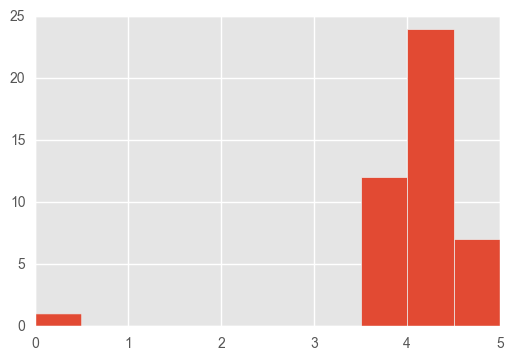

In [25]:
a = chine.rating

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(a)

In [26]:
chine.isnull().sum()

title                   0
rating                  0
calories                2
protein                 2
fat                     2
sodium                  2
#cakeweek               0
#wasteless              0
22-minute meals         0
3-ingredient recipes    0
                       ..
yellow squash           0
yogurt                  0
yonkers                 0
yuca                    0
zucchini                0
cookbooks               0
leftovers               0
snack                   0
snack week              0
turkey                  0
dtype: int64

In [27]:
chine.calories.dropna()

12840     285.0
6548      285.0
16213     932.0
8683      984.0
4172      352.0
13099     451.0
1004      126.0
15080     328.0
1003      591.0
16778     726.0
          ...  
19929     936.0
14874     344.0
10559     687.0
10622     578.0
19699     451.0
11458      75.0
15961     269.0
7310       11.0
10334     150.0
19875    2588.0
Name: calories, dtype: float64

In [28]:
chine.calories.count()

42

In [29]:
type(chine.calories)

pandas.core.series.Series

In [30]:
chine.calories.isnull().sum()

2

In [31]:
chine2 = chine.dropna()

In [32]:
chine2.count()

title                   42
rating                  42
calories                42
protein                 42
fat                     42
sodium                  42
#cakeweek               42
#wasteless              42
22-minute meals         42
3-ingredient recipes    42
                        ..
yellow squash           42
yogurt                  42
yonkers                 42
yuca                    42
zucchini                42
cookbooks               42
leftovers               42
snack                   42
snack week              42
turkey                  42
dtype: int64

In [33]:
chine.sort_values("protein",ascending=False)

,title,rating,calories,protein,fat,...,cookbooks,leftovers,snack,snack week,turkey
9134,Twice-Cooked Five-Spice Lamb with Red Chiles,4.375,959.0,82.0,58.0,...,0.0,0.0,0.0,0.0,0.0
19875,Peanut-Crusted Lamb with Hunan Sauce,4.375,2588.0,81.0,234.0,...,0.0,0.0,0.0,0.0,0.0
16350,Poached Chicken with Ginger and Scallion Sauce,4.375,1124.0,75.0,87.0,...,0.0,0.0,0.0,0.0,0.0
16809,Steamed Fish with Lime and Chile,5.000,461.0,74.0,10.0,...,0.0,0.0,0.0,0.0,0.0
19929,"Braised Chicken with Smoked Ham, Chestnuts, an...",4.375,936.0,70.0,55.0,...,0.0,0.0,0.0,0.0,0.0
10622,Spicy Braised Chicken with Mushrooms and Star ...,4.375,578.0,55.0,27.0,...,0.0,0.0,0.0,0.0,0.0
1003,Chicken Curry with Sweet Potatoes,5.000,591.0,54.0,21.0,...,0.0,0.0,0.0,0.0,0.0
10559,Easy Beef Lo Mein,4.375,687.0,48.0,25.0,...,0.0,0.0,0.0,0.0,0.0
16778,Chicken with Chestnuts,3.750,726.0,43.0,49.0,...,0.0,0.0,0.0,0.0,0.0
1799,Chicken Lo Mein with Ginger Mushrooms,3.750,833.0,38.0,37.0,...,0.0,0.0,0.0,0.0,0.0


In [34]:
chine2 = chine[chine.protein > 2.0]

In [35]:
chine2.count()

title                   39
rating                  39
calories                39
protein                 39
fat                     39
sodium                  39
#cakeweek               39
#wasteless              39
22-minute meals         39
3-ingredient recipes    39
                        ..
yellow squash           39
yogurt                  39
yonkers                 39
yuca                    39
zucchini                39
cookbooks               39
leftovers               39
snack                   39
snack week              39
turkey                  39
dtype: int64

In [36]:
#How to see the ingredients in a recipe

In [37]:
chine.index

Int64Index([12840,  6548, 16213,  8683,  4172, 13099,  1004, 15080,  1003,
            16778, 16224,  4588,  2238, 14258,  1317, 10302, 17380,  8024,
            13546,  4314, 13375,  1799,   107, 16809, 18373,  9134,   259,
            16350,  2439, 15759,  8240,  1047, 10723, 19929, 14874, 10559,
            18332, 10622, 19699, 11458, 15961,  7310, 10334, 19875],
           dtype='int64')

In [38]:
type(chine)

pandas.core.frame.DataFrame

In [39]:
c = df.iloc[9134] > 1

print c == True

title                    True
rating                   True
calories                 True
protein                  True
fat                      True
sodium                   True
#cakeweek               False
#wasteless              False
22-minute meals         False
3-ingredient recipes    False
                        ...  
yellow squash           False
yogurt                  False
yonkers                 False
yuca                    False
zucchini                False
cookbooks               False
leftovers               False
snack                   False
snack week              False
turkey                  False
Name: 9134, dtype: bool


In [43]:
 df2 = df.loc[:, (df != 0).any(axis=0)]

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [205]:
print chine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 12840 to 19875
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 233.9+ KB
None


In [207]:
# clean the dataset. 
#Combine the bon apetit columns

#Group by food vs not food

